In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("df_98039_N.csv")

In [3]:
df.head()

,sqft_living,price
0,4860,2950000.0
1,4210,1905000.0
2,1220,875000.0
3,1220,940000.0
4,7080,4000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  50 non-null     int64  
 1   price        50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [5]:
X = df.iloc[:, 0]                                # read first column
y = df.iloc[:, 1]                                # read second column
m = len(y)                                       # number of training example 

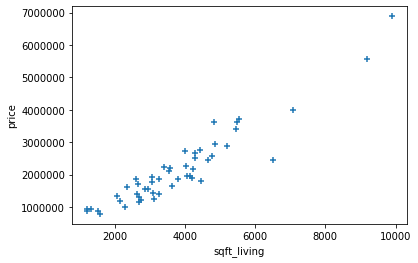

In [6]:
plt.scatter(X, y, marker = '+')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

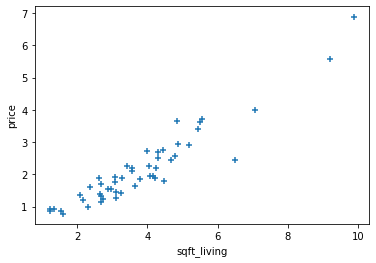

In [7]:
plt.scatter(X/1000, y/1000000, marker = '+')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [8]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
ones = np.ones((m,1))
X = np.hstack((ones, X))                            # X = np.stack((ones, X), axis = 1)

In [9]:
#theta = np.zeros([2,1])
iterations = 100
alpha = 0.1
theta = np.array([-1, 4])[:, np.newaxis]
theta

array([[-1],
       [ 4]])

In [10]:
X[:, 1] = X[:, 1] / 1000

In [11]:
y = y / 1000000

In [12]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)


J = computeCost(X, y, theta)
print(J)

90.001767185879


In [13]:
costHist = np.zeros([iterations+1, 1])
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        costHist[i] = computeCost(X, y, theta)
        temp = np.dot(X, theta) - y                      # np.dot - dot product
        temp = np.dot(X.T, temp)                         # T - transpose
        theta = theta - (alpha/m) * temp
    return theta


theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-0.4773381]
 [ 0.6820426]]


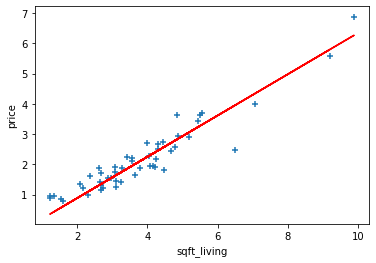

In [14]:
plt.scatter(X[:,1], y, marker = '+' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(X[:,1], np.dot(X, theta), 'r')
plt.show()

[0, 25, 0, 20]

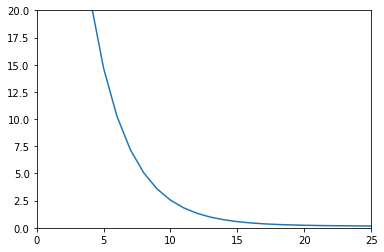

In [15]:
plt.plot(costHist)
plt.axis([0, 25, 0, 20])

In [16]:
def predict(x_sqft, theta) :
    predict = theta[0] + theta[1]*(x_sqft/1000)
    return predict*1000000

predict(8000, theta)

array([4979002.70075533])

# Mean normalization

In [17]:
data = pd.read_csv("df_98039_N.csv")
X = data.iloc[:, 0]                                # read first column
y = data.iloc[:, 1]                                # read second column
m = len(y)                                         # number of training example 

In [18]:
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [19]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
ones = np.ones((m,1))
X = np.hstack((ones, X))

In [20]:
#theta = np.zeros([2,1])
iterations = 100
alpha = 1
theta = np.array([-1, 4])[:, np.newaxis]
theta

array([[-1],
       [ 4]])

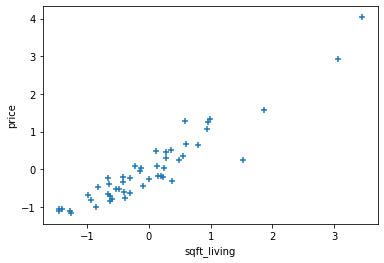

In [21]:
plt.scatter(X[:, 1], y, marker = '+')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [22]:
J = computeCost(X, y, theta)
print(J)

5.141723413479793


In [23]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-6.38378239e-17]
 [ 9.40886884e-01]]


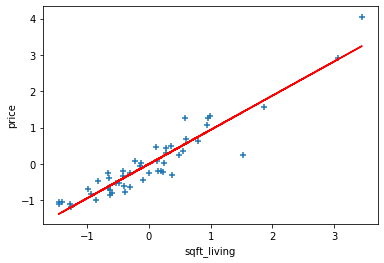

In [24]:
plt.scatter(X[:,1], y, marker = '+' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(X[:,1], np.dot(X, theta), 'r')
plt.show()

[0, 25, 0, 20]

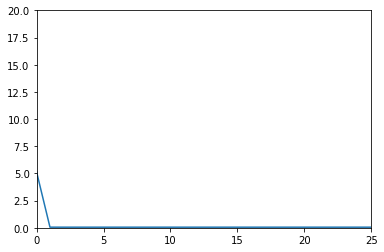

In [25]:
plt.plot(costHist)
plt.axis([0, 25, 0, 20])

In [26]:
def h_predict(x_sqft, theta):
    h_predict = y_std * (theta[0] + theta[1] * (x_sqft - X_mean)/X_std) + y_mean
    return h_predict

h_predict(8000, theta)

array([4772453.17307623])